In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from numpy import linalg as LA

**Support Vector Machine**

In [ ]:
# Reading csv file
df = pd.read_csv('iris.data',header=None)

# Seperate data and class
iris = df.iloc[:,[0,1,2,3]].values
category = df.iloc[:,[-1]].values

# Assigning numbers for each class
op_cat = ['Iris-setosa','Iris-versicolor','Iris-virginica']
y = []
for i in range(len(category)):
  if category[i] == op_cat[0]:
    y.append(0)
  elif category[i] == op_cat[1]:
    y.append(1)
  elif category[i] == op_cat[2]:
    y.append(2)

# Creating the model
model = SVC()

In [ ]:
# Splitting the test and train dataset in 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(iris, y, test_size=0.25)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

# Calculating accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[16  0  0]
 [ 0 11  2]
 [ 0  1  8]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 84.61538461538461
Accuracy of Iris-virginica is 88.88888888888889


In [ ]:
# Splitting the test and train dataset in 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(iris, y, test_size=0.2)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

# Calculating accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[13  0  0]
 [ 0 10  0]
 [ 0  1  6]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 100.0
Accuracy of Iris-virginica is 85.71428571428571


**Principal Component Analysis**

In [ ]:
# Reading csv file
df = pd.read_csv('iris.data',header=None)

# Seperate data and class
iris = df.iloc[:,[0,1,2,3]].values
category = df.iloc[:,[-1]].values

# Assigning numbers for each class
op_cat = ['Iris-setosa','Iris-versicolor','Iris-virginica']
y = []
for i in range(len(category)):
  if category[i] == op_cat[0]:
    y.append(0)
  elif category[i] == op_cat[1]:
    y.append(1)
  elif category[i] == op_cat[2]:
    y.append(2)

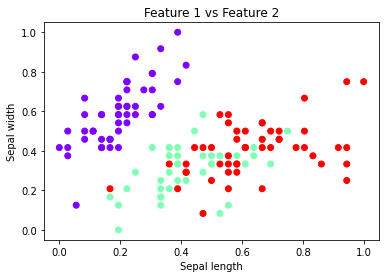

In [ ]:
plt.title('Feature 1 vs Feature 2')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(iris[:,0],iris[:,1],c=y,cmap='rainbow')

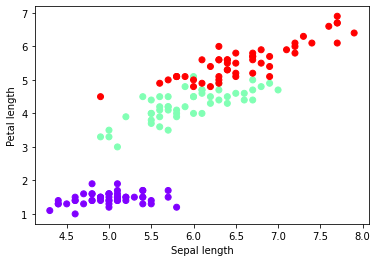

In [ ]:
plt.title('Feature 1 vs Feature 3')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.scatter(iris[:,0],iris[:,2],c=y,cmap='rainbow')

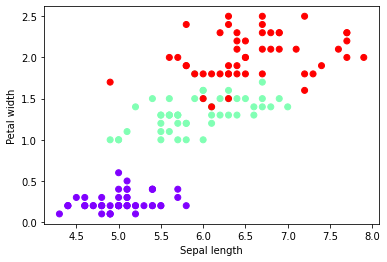

In [ ]:
plt.title('Feature 1 vs Feature 4')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.scatter(iris[:,0],iris[:,3],c=y,cmap='rainbow')

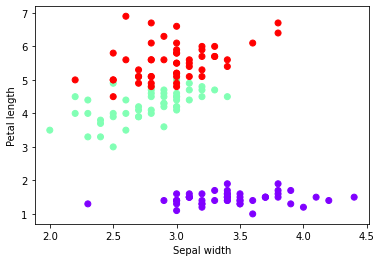

In [ ]:
plt.title('Feature 2 vs Feature 3')
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.scatter(iris[:,1],iris[:,2],c=y,cmap='rainbow')

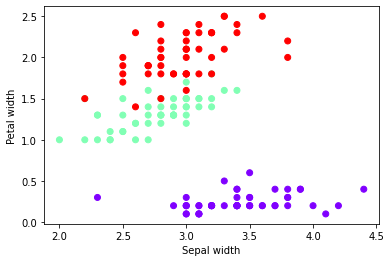

In [ ]:
plt.title('Feature 2 vs Feature 4')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.scatter(iris[:,1],iris[:,3],c=y,cmap='rainbow')

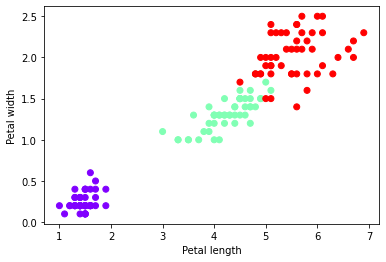

In [ ]:
plt.title('Feature 3 vs Feature 4')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(iris[:,2],iris[:,3],c=y,cmap='rainbow')

In [ ]:
# Calculating minimum and maximum value for each feature
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Normalizing the dataset considering each row
def normalize_dataset(dataset):
  minmax=dataset_minmax(dataset)
  for row in dataset:
    for i in range(len(row)):
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
   
normalize_dataset(iris)

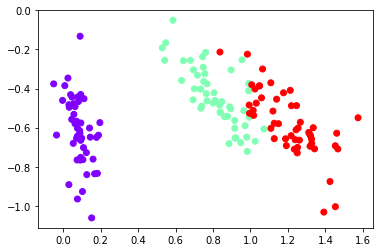

In [ ]:
# Calculating the mean of each feature
def feature_mean(data):
  mean = []
  for i in range(data.shape[1]):
    sum = 0
    for j in range(data.shape[0]):
      sum += iris[j][i]
    sum = sum / data.shape[0]
    mean.append(sum)
  return mean

mu = feature_mean(iris)

# Calculating the covariance matrix of the data
def feature_covariance(data, mean):
  covar = np.zeros((data.shape[1],data.shape[1]))
  for j in range(data.shape[1]):
    for k in range(data.shape[1]):
      sum = 0
      for i in range(data.shape[0]):
        sum += (data[i][j]-mean[j])*(data[i][k]-mean[k])
      sum = sum / (data.shape[0]-1)
      covar[j][k] = sum
  return covar

covariance = feature_covariance(iris,mu)

# Calculating the eigen values and eigen vectors of the covariance matrix
w, v = LA.eig(covariance)

# Finding the principal components
P = v[:,[0,1]]

# Finding the projected dataset
X = np.dot(iris,P)

# Plotting the projected dataset
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')